In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [46]:
movies = pd.read_csv('EDA_Notes/titles.csv')
release_dates = pd.read_csv('EDA_Notes/release_dates.csv', parse_dates=['date'],infer_datetime_format=True)
cast = pd.read_csv('EDA_Notes/cast.csv.zip')

In [268]:
movies.sort_values('year')

,title,year
156170,Miss Jerry,1894
41687,The Startled Lover,1898
51257,Reproduction of the Corbett and Jeffries Fight,1899
10581,"Pierrot's Problem, or How to Make a Fat Wife O...",1900
177729,Family Troubles (II),1900
...,...,...
184080,Avatar 4,2024
24277,The Dark Room,2024
152082,Avatar 5,2025
94972,The Zero Century: Maetel,2026


In [49]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


In [50]:
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [51]:
def get_mon(dt):
    return dt.month
release_dates['month'] = release_dates['date'].map(get_mon)

In [52]:
release_dates.head()

,title,year,country,date,month
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15,6
1,#BKKY,2016,Cambodia,2017-10-12,10
2,#Beings,2015,Romania,2015-01-29,1
3,#Captured,2017,USA,2017-09-05,9
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21,1


In [53]:
release_dates.groupby('month')['month'].count()

month
1     42550
2     39096
3     43113
4     40506
5     38257
6     35435
7     34130
8     38021
9     40926
10    44594
11    41355
12    41505
Name: month, dtype: int64

In [54]:
release_dates[release_dates['month'] == 1]['month'].count()

42550

In [55]:
cast[(cast['character'] == 'Harry Potter') & (cast['name'] == 'Daniel Radcliffe')].sort_values('year', ascending = False).iloc[:,0]

1860046    Harry Potter and the Deathly Hallows: Part 2
1860045    Harry Potter and the Deathly Hallows: Part 1
1860048          Harry Potter and the Half-Blood Prince
1860049       Harry Potter and the Order of the Phoenix
1860047             Harry Potter and the Goblet of Fire
1860050        Harry Potter and the Prisoner of Azkaban
1860044         Harry Potter and the Chamber of Secrets
1860051           Harry Potter and the Sorcerer's Stone
Name: title, dtype: object

In [62]:
movies[movies['year']== 2017]['year'].count()

11474

In [63]:
len(movies[movies['year'] == 2015])

8702

In [69]:
movies[movies['title'] == 'Hamlet']

,title,year
1931,Hamlet,2009
8214,Hamlet,1976
46344,Hamlet,1921
55639,Hamlet,2000
73869,Hamlet,1948
98326,Hamlet,1990
118535,Hamlet,1913
124506,Hamlet,1911
140203,Hamlet,1954
155004,Hamlet,1964


In [71]:
movies[(movies['title'] == 'Hamlet') & (movies['year'] > 2000)]['name'].sort_values('year')

,title,year
1931,Hamlet,2009
227953,Hamlet,2011
178290,Hamlet,2014
186137,Hamlet,2015
191940,Hamlet,2016
244747,Hamlet,2017


In [81]:
cast[cast['title'] == 'Inception'].count()

title        78
year         78
name         78
type         78
character    78
n            51
dtype: int64

In [108]:
top_ten = cast[(cast['title'] == 'Inception') & (cast['n'].isna() == False)][['name','n']].set_index('name')
top_ten.sort_values(by='n',ascending=False)
top_ten.head(10)

,n
name,
Peter Basham,44.0
Tom Berenger,8.0
Virgile Bramly,29.0
Michael Caine,11.0
Earl Cameron,20.0
Nicolas Clerc,26.0
Adam (IV) Cole,34.0
Jean-Michel Dagory,30.0
Leonardo DiCaprio,1.0


In [110]:
cast[cast['character'] == 'Albus Dumbledore']['title']

704984                                    Epic Movie
792421           Harry Potter and the Goblet of Fire
792423     Harry Potter and the Order of the Phoenix
792424      Harry Potter and the Prisoner of Azkaban
947789       Harry Potter and the Chamber of Secrets
947790         Harry Potter and the Sorcerer's Stone
1685537                        Ultimate Hero Project
2248085                                       Potter
Name: title, dtype: object

In [116]:
cast[cast['character'] == 'Albus Dumbledore']['name'].drop_duplicates()

704984            Dane Farwell
792421          Michael Gambon
947789          Richard Harris
1685537    George (X) O'Connor
2248085      Timothy Tedmanson
Name: name, dtype: object

In [131]:
cast[cast['name'] == 'Keanu Reeves']['character'].drop_duplicates().count()

56

In [230]:
keanu_movies = cast[(cast['name'] == 'Keanu Reeves') & (cast['n'] ==1) & (cast['year'] >= 1999) ]
keanu_movies.reset_index(drop = True)


,title,year,name,type,character,n
0,47 Ronin,2013,Keanu Reeves,actor,Kai,1.0
1,Constantine,2005,Keanu Reeves,actor,John Constantine,1.0
2,Hard Ball,2001,Keanu Reeves,actor,Conor O'Neill,1.0
3,Henry's Crime,2010,Keanu Reeves,actor,Henry Torne,1.0
4,John Wick,2014,Keanu Reeves,actor,John Wick,1.0
5,John Wick: Chapter 2,2017,Keanu Reeves,actor,John Wick,1.0
6,Knock Knock,2015,Keanu Reeves,actor,Evan,1.0
7,Siberia,2018,Keanu Reeves,actor,Lucas Hill,1.0
8,Street Kings,2008,Keanu Reeves,actor,Detective Tom Ludlow,1.0
9,Sweet November,2001,Keanu Reeves,actor,Nelson Moss,1.0


In [222]:
cast[(cast['year'] >= 1950) & (cast['year'] <= 1960) ]['character'].count()

234635

In [148]:
keanu_movies_allcast_nona = keanu_movies_allcast.dropna()

In [199]:
keanu_piv = keanu_movies_allcast_nona.pivot_table(values = 'n',index=['title','name']).sort_values(by='n',ascending = False)

In [223]:
cast.title

0                            Closet Monster
1                           Suuri illusioni
2                       Battle of the Sexes
3                      Secret in Their Eyes
4                                Steve Jobs
                         ...               
3786171                             Foxtrot
3786172    Niceland (Population. 1.000.002)
3786173                           Skammdegi
3786174                        U.S.S.S.S...
3786175                   Bye Bye Blue Bird
Name: title, Length: 3786176, dtype: object

In [239]:
movies.groupby('year')['year'].count().sort_values(ascending=False)

year
2017    11474
2016     9440
2015     8702
2014     8264
2018     8041
        ...  
2115        1
1903        1
2026        1
2025        1
1894        1
Name: year, Length: 128, dtype: int64

In [275]:
def dec(yr):
    return yr//10
newyears ={}
for i in range(1890,2031,10):
    newyears[i]=0 
 
for x in movies['year']:
    if x <= 2031:
        newyears[dec(x)*10] = newyears[dec(x)*10] +1

decades = []
movie_count = []
for key,value in newyears.items():
    decades.append(key)
    movie_count.append(value)

movie_count_dict = {'decade':decades, 'movie_count':movie_count}
df_movie_count_per_decade = pd.DataFrame(movie_count_dict)   
df_movie_count_per_decade 

,decade,movie_count
0,1890,3
1,1900,39
2,1910,6799
3,1920,9034
4,1930,10388
5,1940,8718
6,1950,12934
7,1960,17976
8,1970,19526
9,1980,21034


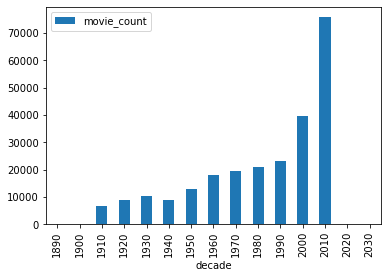

In [280]:
df_movie_count_per_decade.plot(kind='bar',x='decade',y='movie_count')
plt.show()

In [284]:
cast.groupby('character')['character'].count().sort_values(ascending=False).head(10)

character
Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Name: character, dtype: int64

In [299]:
cast_as_herself = cast[cast['character'] == 'Herself']
#cast.groupby('character')['character'].count().sort_values(ascending=False).head(10)
cast_as_herself.groupby('name')['name'].count().sort_values(ascending=False).head(10)

name
Queen Elizabeth II           12
Joyce Brothers                9
Luisa Horga                   9
Mar?a Luisa (V) Mart?n        9
Margaret Thatcher             8
Hillary Clinton               8
In?s J. Southern              6
Mar?a Isabel (III) Mart?n     6
Marilyn Monroe                6
Rekha                         6
Name: name, dtype: int64

In [300]:
cast_as_himself = cast[cast['character'] == 'Himself']
#cast.groupby('character')['character'].count().sort_valu
cast_as_himself.groupby('name')['name'].count().sort_values(ascending=False).head(10)

name
Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Bill Clinton             22
Ron Jeremy               22
Franklin D. Roosevelt    21
Name: name, dtype: int64

In [297]:
zombie_character = cast[cast['character'].str.startswith('Zombie') == True]

In [301]:
zombie_character.groupby('character')['character'].count().sort_values(ascending=False).head(10)

character
Zombie                         6264
Zombie Horde                    206
Zombie - Protestor - Victim      78
Zombie Extra                     70
Zombie Dancer                    43
Zombie #1                        36
Zombie Girl                      36
Zombie #2                        31
Zombie Vampire                   25
Zombie Victim                    22
Name: character, dtype: int64

In [303]:
police_character = cast[cast['character'].str.startswith('Police') == True]
police_character.groupby('character')['character'].count().sort_values(ascending=False).head(10)





character
Policeman              7029
Police Officer         4808
Police Inspector        742
Police Sergeant         674
Police officer          539
Police                  456
Policewoman             415
Police Chief            410
Police Captain          387
Police Commissioner     337
Name: character, dtype: int64

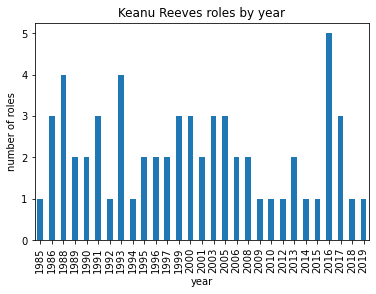

In [325]:
keanu_roles = cast[cast['name'] == 'Keanu Reeves'].groupby(['year'])['year'].count()

keanu_roles.plot(kind ='bar', ylabel = 'number of roles', title='Keanu Reeves roles by year' );

In [346]:
keanu_roles = cast[cast['name'] == 'Keanu Reeves'].groupby(['year','n'])['n'].count()

#keanu_roles.plot(kind ='bar', ylabel = 'number of roles', title='Keanu Reeves roles by year' );

In [347]:
keanu_roles

year  n   
1985  1.0     1
1986  2.0     1
      3.0     1
      12.0    1
1988  1.0     1
      2.0     1
      5.0     1
      6.0     1
1989  1.0     1
      8.0     1
1990  2.0     1
      6.0     1
1991  1.0     1
      2.0     2
1992  4.0     1
1993  1.0     1
      5.0     1
      13.0    1
1994  1.0     1
1995  1.0     2
1996  1.0     2
1997  1.0     1
      2.0     1
1999  1.0     1
      42.0    2
2000  1.0     1
      3.0     2
2001  1.0     2
2003  3.0     1
      33.0    1
      59.0    1
2005  1.0     1
      17.0    1
      21.0    1
2006  1.0     1
      4.0     1
2008  1.0     2
2009  16.0    1
2010  1.0     1
2013  1.0     1
      2.0     1
2014  1.0     1
2015  1.0     1
2016  1.0     1
      4.0     1
      8.0     2
      25.0    1
2017  1.0     1
      11.0    1
2018  1.0     1
Name: n, dtype: int64

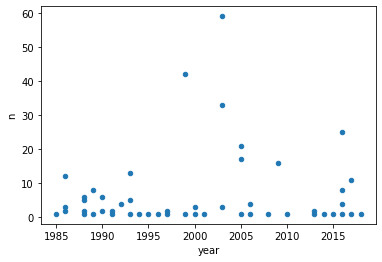

In [349]:
keanu_cast_Positions.plot.scatter( y = 'n', x='year' );

In [353]:
hamlet_films = movies[movies['title'].str.contains('Hamlet') == True].sort_values('year')

hamlet_films

,title,year
181090,Hamlet,1910
124506,Hamlet,1911
118535,Hamlet,1913
142663,A Sagebrush Hamlet,1919
46344,Hamlet,1921
66134,"Han, hun og Hamlet",1922
108528,"Han, hun og Hamlet",1932
73869,Hamlet,1948
140203,Hamlet,1954
155004,Hamlet,1964


In [357]:
hamlet_count_per_dec ={}
for i in range(1890,2031,10):
    hamlet_count_per_dec[i]=0 

for x in hamlet_films['year']:
    if x <= 2020:
        hamlet_count_per_dec[dec(x)*10] = hamlet_count_per_dec[dec(x)*10] +1

decades = []
movie_count = []
for key,value in hamlet_count_per_dec.items():
    decades.append(key)
    movie_count.append(value)

hamlet_count_dict = {'decade':decades, 'movie_count':movie_count}
df_hamlet_count_per_decade = pd.DataFrame(hamlet_count_dict)   
df_hamlet_count_per_decade 

,decade,movie_count
0,1890,0
1,1900,0
2,1910,4
3,1920,2
4,1930,1
5,1940,1
6,1950,1
7,1960,3
8,1970,4
9,1980,3


<AxesSubplot:xlabel='decade'>

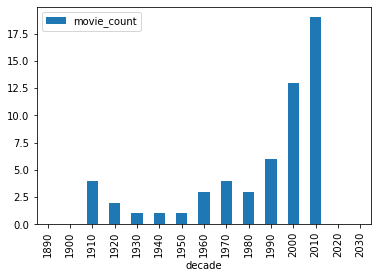

In [361]:
df_hamlet_count_per_decade .plot.bar(x='decade',y='movie_count')

In [366]:
len(cast[(cast['n'] == 1) & (1960 <= cast['year']) & (cast['year'] <= 1969)])

11823

In [367]:
len(cast[(cast['n'] == 1) & (2000 <= cast['year']) & (cast['year'] <= 2009)])

26344

In [452]:
oz_role_year = cast[cast['name'] == 'Frank Oz'][['year','title']]
oz_role_year['count']=0
oz_role_year=oz_role_year.set_index(['year','title']).sort_values(by='year')
oz_role_title_cnt = oz_role_year.groupby(['title','year']).count()
oz_role_title_cnt = oz_role_title_cnt.sort_values(by='year').reset_index()
oz_role_title_cnt[oz_role_title_cnt['count'] > 1]
#oz_role_year['count'] = 0

#oz_role_year=oz_role_year.set_index(['year','title'])
#oz_role_year = oz_role_year.sort_values(by='year')

#oz_role_count = oz_role_year.groupby('year').count().reset_index()
#oz_role_year.groupby('year')['title'].count().reset_index()
#oz_role_year.groupby('year')['title'].count()
#oz_role_count = oz_role_count.reset_index()
#oz_role_count
#oz_role_count.rename(columns = {'year':'count'},inplace=True)
#cast.set_index(['title','year'])



,title,year,count
0,The Muppet Movie,1979,8
3,An American Werewolf in London,1981,2
4,The Great Muppet Caper,1981,6
5,The Dark Crystal,1982,2
9,The Muppets Take Manhattan,1984,7
10,Follow That Bird,1985,3
14,The Muppet Christmas Carol,1992,7
15,Muppet Treasure Island,1996,4
17,Muppets from Space,1999,4
18,The Adventures of Elmo in Grouchland,1999,3


In [449]:
oz_roles = cast[cast['name'] == 'Frank Oz'][['character']]
oz_roles['count']=0
oz_roles = oz_roles.groupby('character').count().reset_index()
oz_roles[oz_roles['count'] >= 2]

,character,count
0,Animal,6
2,Bert,3
5,Cookie Monster,5
10,Fozzie Bear,4
15,Grover,2
18,Miss Piggy,6
25,Sam the Eagle,5
34,Yoda,6


<AxesSubplot:>

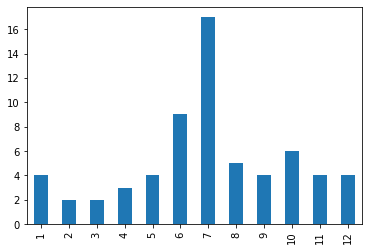

In [450]:
summer = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
summer.date.dt.month.value_counts().sort_index().plot(kind='bar')

In [496]:
#keanu_movies = cast[(cast['name'] == 'Keanu Reeves') & (cast['n'] == 1)]
#keanu_releases = release_dates[(release_dates['title'].isin(keanu_movies['title'])) & release_dates['country'] == 'USA']

keanu_movies = cast[(cast['name'] == 'Keanu Reeves') & (cast['n'] == 1]
keanu_release = release_dates[(release_dates['title'].isin(keanu_movies['title'])) & (release_dates['country'] == 'USA')]
keanu_merge = pd.merge(keanu_movies,keanu_release,how='inner',on=['title','year'],indicator = True)
keanu_merge[['title','date']].sort_values(by='date')





,title,date
20,The Night Before,1988-04-15
3,Bill & Ted's Excellent Adventure,1989-02-17
2,Bill & Ted's Bogus Journey,1991-07-19
12,Little Buddha,1994-05-25
13,Speed,1994-06-10
10,Johnny Mnemonic,1995-05-26
1,A Walk in the Clouds,1995-08-11
4,Chain Reaction,1996-08-02
6,Feeling Minnesota,1996-09-13
17,The Devil's Advocate,1997-10-17


In [481]:
keanu_releases[keanu_releases['date'] > '1988-04-15'][['title','date']].sort_values(by='date')

,title,date
46177,Bill & Ted's Excellent Adventure,1989-02-17
46168,Bill & Ted's Bogus Journey,1991-07-19
223169,Little Buddha,1994-05-25
340790,Speed,1994-06-10
184929,Johnny Mnemonic,1995-05-26
11608,A Walk in the Clouds,1995-08-11
65652,Chain Reaction,1996-08-02
121691,Feeling Minnesota,1996-09-13
376349,The Devil's Advocate,1997-10-17
402797,The Matrix,1999-03-31


In [522]:
keanu_movies_all = cast[cast['name'] == 'Keanu Reeves']
keanu_release_all = release_dates[(release_dates['title'].isin(keanu_movies_all['title'])) & (release_dates['country'] == 'USA')]
keanu_merge_all = pd.merge(keanu_movies_all,keanu_release_all,how='inner',on=['title','year'],indicator = True)
keanu_merge_all['month'] = keanu_merge_all.date.dt.month


In [525]:
keanu_merge_all_sort = keanu_merge_all.sort_values(by='year')
keanu_merge_all_sort

,title,year,name,type,character,n,country,date,month,_merge
46,Youngblood,1986,Keanu Reeves,actor,Heaver,12.0,USA,1986-01-31,1,both
25,River's Edge,1986,Keanu Reeves,actor,Matt,2.0,USA,1987-05-08,5,both
41,The Night Before,1988,Keanu Reeves,actor,Winston Connelly,1.0,USA,1988-04-15,4,both
7,Dangerous Liaisons,1988,Keanu Reeves,actor,Chevalier Danceny,5.0,USA,1989-02-24,2,both
23,Permanent Record,1988,Keanu Reeves,actor,Chris Townsend,6.0,USA,1988-04-22,4,both
4,Bill & Ted's Excellent Adventure,1989,Keanu Reeves,actor,Ted,1.0,USA,1989-02-17,2,both
22,Parenthood,1989,Keanu Reeves,actor,Tod,8.0,USA,1989-05-26,5,both
45,Tune in Tomorrow...,1990,Keanu Reeves,actor,Martin Loader,2.0,USA,1990-11-02,11,both
13,I Love You to Death,1990,Keanu Reeves,actor,Marlon,6.0,USA,1990-04-06,4,both
3,Bill & Ted's Bogus Journey,1991,Keanu Reeves,actor,Ted,1.0,USA,1991-07-19,7,both


<AxesSubplot:xlabel='month'>

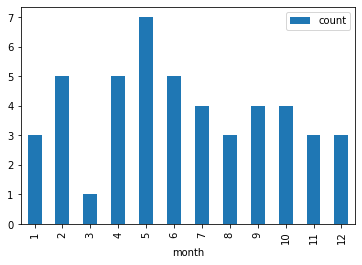

In [526]:
keanu_merge_all_sort['count'] =0
keanu_merge_all_sort_cnt = keanu_merge_all_sort[['month','count']]
keanu_merge_all_sort_cnt = keanu_merge_all_sort_cnt.set_index('month')
keanu_merge_all_sort_cnt =keanu_merge_all_sort_cnt.groupby('month').count().reset_index()
keanu_merge_all_sort_cnt.plot(kind = 'bar', x='month', y = 'count')

<AxesSubplot:xlabel='year'>

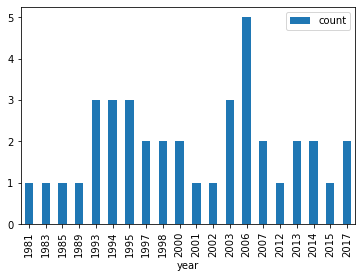

In [533]:
ian_movies_all = cast[cast['name'] == 'Ian McKellen']
ian_release_all = release_dates[(release_dates['title'].isin(ian_movies_all['title'])) & (release_dates['country'] == 'USA')]
ian_merge_all = pd.merge(ian_movies_all,ian_release_all,how='inner',on=['title','year'],indicator = True)
ian_merge_all_sort = ian_merge_all.sort_values(by='year')
ian_merge_all_sort['count'] =0
ian_merge_all_sort_cnt = ian_merge_all_sort[['year','count']]
ian_merge_all_sort_cnt = ian_merge_all_sort_cnt.set_index('year')
ian_merge_all_sort_cnt =ian_merge_all_sort_cnt.groupby('year').count().reset_index()
ian_merge_all_sort_cnt.plot(kind = 'bar', x='year', y = 'count')

In [534]:
!curl -O https://s3.amazonaws.com/openrecipes/20170107-061401-recipeitems.json.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 29.3M  100 29.3M    0     0  7512k      0  0:00:04  0:00:04 --:--:-- 7512k
